# Analysis of Homology mapping for mouse and rat to identify human ortholgs.

In [1]:
#Load data and Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the data
mouse_data = pd.read_csv('../data/processed/mouse/human_ortholog_mapped.csv')
rat_data = pd.read_csv('../data/processed/rat/human_ortholog_mapped.csv')

mouse_int_df = pd.read_csv('../data/processed/mouse/mouse_all_aligned_interfaces.csv')
rat_int_df = pd.read_csv('../data/processed/rat/rat_all_aligned_interfaces.csv')


In [2]:
unique_mouse_protein_count = mouse_data['protein_id'].nunique()
unique_rat_protein_count = rat_data['protein_id'].nunique()

print(f"Unique mouse protein count: {unique_mouse_protein_count}")
print(f"Unique rat protein count: {unique_rat_protein_count}")

df_mouse_above70 = mouse_int_df[mouse_int_df['interface_alignment_percent'] > 70]
df_mouse_unique_above70 = df_mouse_above70['protein_id'].nunique()

print(f"\nUnique mouse proteins with alignment > 70%: {df_mouse_unique_above70}")

df_rat_above70 = rat_int_df[rat_int_df['interface_alignment_percent'] > 70]
df_rat_unique_above70 = df_rat_above70['protein_id'].nunique()

print(f"Unique rat proteins with alignment > 70%: {df_rat_unique_above70}")

print(f"\nNumber of mouse interactions with alignment > 70%: {len(df_mouse_above70)}")
print(f"Number of rat interactions with alignment > 70%: {len(df_rat_above70)}")

Unique mouse protein count: 6015
Unique rat protein count: 5772

Unique mouse proteins with alignment > 70%: 1777
Unique rat proteins with alignment > 70%: 1618

Number of mouse interactions with alignment > 70%: 4386
Number of rat interactions with alignment > 70%: 4091


In [3]:
# Analyze number of orthologs identified for each dataset.

# Mouse data numbers:
n_total_mouse = len(mouse_data)
n_orthologs_mouse = len(mouse_data[mouse_data["human_ortholog_id"].notna()])
n_no_orthologs_mouse = len(mouse_data[mouse_data["human_ortholog_id"].isna()])

print(f"Mouse data:")
print(f"Total phosphorylation sites: {n_total_mouse}")
print(f"Orthologs identified: {n_orthologs_mouse}")
print(f"No orthologs identified: {n_no_orthologs_mouse}")
print(f"Percentage of phosphorylation sites with orthologs: {n_orthologs_mouse / n_total_mouse * 100:.2f}%")

# Rat data numbers:
n_total_rat = len(rat_data)
n_orthologs_rat = len(rat_data[rat_data["human_ortholog_id"].notna()])
n_no_orthologs_rat = len(rat_data[rat_data["human_ortholog_id"].isna()])

print(f"\nRat data:")
print(f"Total phosphorylation sites: {n_total_rat}")
print(f"Orthologs identified: {n_orthologs_rat}")
print(f"No orthologs identified: {n_no_orthologs_rat}")
print(f"Percentage of phosphorylation sites with orthologs: {n_orthologs_rat / n_total_rat * 100:.2f}%")



Mouse data:
Total phosphorylation sites: 30442
Orthologs identified: 29354
No orthologs identified: 1088
Percentage of phosphorylation sites with orthologs: 96.43%

Rat data:
Total phosphorylation sites: 23004
Orthologs identified: 20235
No orthologs identified: 2769
Percentage of phosphorylation sites with orthologs: 87.96%


In [4]:
# Average interface alignment percentage for mouse and rat
average_mouse_interface_alignment = mouse_int_df['interface_alignment_percent'].mean()
average_rat_interface_alignment = rat_int_df['interface_alignment_percent'].mean()

print(f"Average interface alignment percentage for mouse: {average_mouse_interface_alignment:.2f}%")
print(f"Average interface alignment percentage for rat: {average_rat_interface_alignment:.2f}%")

# Number of aligned interfaces above 90%, 80%, 70%, 60%, 50% for mouse and rat

# Mouse
mouse_90_to_100 = mouse_int_df['interface_alignment_percent'].loc[mouse_int_df['interface_alignment_percent'] >= 90].count()
mouse_80_to_90 = mouse_int_df['interface_alignment_percent'].loc[(mouse_int_df['interface_alignment_percent'] < 90) & (mouse_int_df['interface_alignment_percent'] >= 80)].count()
mouse_70_to_80 = mouse_int_df['interface_alignment_percent'].loc[(mouse_int_df['interface_alignment_percent'] < 80) & (mouse_int_df['interface_alignment_percent'] >= 70)].count()
mouse_60_to_70 = mouse_int_df['interface_alignment_percent'].loc[(mouse_int_df['interface_alignment_percent'] < 70) & (mouse_int_df['interface_alignment_percent'] >= 60)].count()
mouse_50_to_60 = mouse_int_df['interface_alignment_percent'].loc[(mouse_int_df['interface_alignment_percent'] < 60) & (mouse_int_df['interface_alignment_percent'] >= 50)].count()

# Rat
rat_90_to_100 = rat_int_df['interface_alignment_percent'].loc[rat_int_df['interface_alignment_percent'] >= 90].count()
rat_80_to_90 = rat_int_df['interface_alignment_percent'].loc[(rat_int_df['interface_alignment_percent'] < 90) & (rat_int_df['interface_alignment_percent'] >= 80)].count()
rat_70_to_80 = rat_int_df['interface_alignment_percent'].loc[(rat_int_df['interface_alignment_percent'] < 80) & (rat_int_df['interface_alignment_percent'] >= 70)].count()
rat_60_to_70 = rat_int_df['interface_alignment_percent'].loc[(rat_int_df['interface_alignment_percent'] < 70) & (rat_int_df['interface_alignment_percent'] >= 60)].count()
rat_50_to_60 = rat_int_df['interface_alignment_percent'].loc[(rat_int_df['interface_alignment_percent'] < 60) & (rat_int_df['interface_alignment_percent'] >= 50)].count()

#print
print("\nNumber of aligned interfaces above 90%, 80%, 70%, 60%, 50% for Mouse:")
print(f"90%-100%: {mouse_90_to_100}")
print(f"80%-90%: {mouse_80_to_90}")
print(f"70%-80%: {mouse_70_to_80}")
print(f"60%-70%: {mouse_60_to_70}")
print(f"50%-60%: {mouse_50_to_60}")

print("\nNumber of aligned interfaces above 90%, 80%, 70%, 60%, 50% for Rat:")
print(f"90%-100%: {rat_90_to_100}")
print(f"80%-90%: {rat_80_to_90}")
print(f"70%-80%: {rat_70_to_80}")
print(f"60%-70%: {rat_60_to_70}")
print(f"50%-60%: {rat_50_to_60}")

Average interface alignment percentage for mouse: 94.75%
Average interface alignment percentage for rat: 93.54%

Number of aligned interfaces above 90%, 80%, 70%, 60%, 50% for Mouse:
90%-100%: 3907
80%-90%: 350
70%-80%: 133
60%-70%: 67
50%-60%: 45

Number of aligned interfaces above 90%, 80%, 70%, 60%, 50% for Rat:
90%-100%: 3534
80%-90%: 397
70%-80%: 162
60%-70%: 91
50%-60%: 42


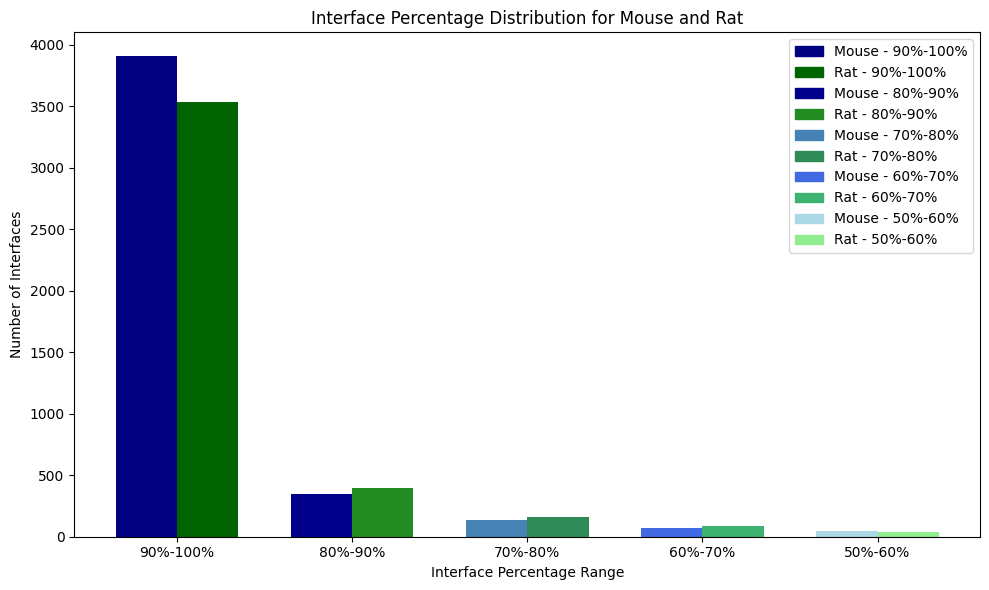

In [5]:
# Graph of interface percentage distribution for mouse and rat

# Mouse
mouse_percentages = [mouse_90_to_100, mouse_80_to_90, mouse_70_to_80, mouse_60_to_70, mouse_50_to_60]
percent_categories = ['90%-100%', '80%-90%', '70%-80%', '60%-70%', '50%-60%']
rat_percentages = [rat_90_to_100, rat_80_to_90, rat_70_to_80, rat_60_to_70, rat_50_to_60]

mouse_colors = ['navy', 'darkblue', 'steelblue', 'royalblue', 'lightblue']
rat_colors = ['darkgreen', 'forestgreen', 'seagreen', 'mediumseagreen', 'lightgreen']

# Create bar plot for mouse and rat
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(percent_categories))
width = 0.35

for i in range(len(percent_categories)):
    ax.bar(x[i] - width/2, mouse_percentages[i], width, color=mouse_colors[i])
    ax.bar(x[i] + width/2, rat_percentages[i], width, color=rat_colors[i])

legend_elements = []
for i, category in enumerate(percent_categories):
    legend_elements.append(mpatches.Patch(color=mouse_colors[i], label=f'Mouse - {category}'))
    legend_elements.append(mpatches.Patch(color=rat_colors[i], label=f'Rat - {category}'))

ax.set_xlabel('Interface Percentage Range')
ax.set_ylabel('Number of Interfaces')
ax.set_title('Interface Percentage Distribution for Mouse and Rat')
ax.set_xticks(x)
ax.set_xticklabels(percent_categories)
ax.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.show()






In [6]:
# Analysis of alignment percentages for mouse_all_aligned_interfaces.csv and morf_aligned_interfaces.csv

# Load the aligned interface files
mouse_all_aligned = pd.read_csv('../data/processed/mouse/mouse_all_aligned_interfaces.csv')
mouse_morf_aligned = pd.read_csv('../data/processed/mouse/morf_aligned_interfaces.csv')

print("=" * 80)
print("Analysis of Alignment Percentages")
print("=" * 80)
print()

# ============================================================================
# Analysis for mouse_all_aligned_interfaces.csv
# ============================================================================
print("MOUSE ALL ALIGNED INTERFACES (mouse_all_aligned_interfaces.csv)")
print("-" * 80)

# Count interactions with alignment_percent > 70%
interactions_above_70 = mouse_all_aligned[mouse_all_aligned['interface_alignment_percent'] > 70]
n_interactions_above_70 = len(interactions_above_70)

# Count rows with data in phosphoprotein_IRES (these count as alignment > 70%)
rows_with_phosphoprotein_IRES = mouse_all_aligned[
    mouse_all_aligned['phosphoprotein_IRES'].notna() & 
    (mouse_all_aligned['phosphoprotein_IRES'] != '') &
    (mouse_all_aligned['phosphoprotein_IRES'].astype(str).str.strip() != '')
]
n_rows_with_phosphoprotein_IRES = len(rows_with_phosphoprotein_IRES)

# Combine: interactions with alignment_percent > 70% OR rows with phosphoprotein_IRES data
# (avoid double counting - if a row has both, it should only count once)
combined_above_70 = mouse_all_aligned[
    (mouse_all_aligned['interface_alignment_percent'] > 70) |
    (mouse_all_aligned['phosphoprotein_IRES'].notna() & 
     (mouse_all_aligned['phosphoprotein_IRES'] != '') &
     (mouse_all_aligned['phosphoprotein_IRES'].astype(str).str.strip() != ''))
]
n_combined_above_70 = len(combined_above_70)

# Number of unique proteins with at least one interface with alignment > 70%
unique_proteins_above_70 = combined_above_70['protein_id'].nunique()

print(f"Total interactions in file: {len(mouse_all_aligned)}")
print(f"Interactions with interface_alignment_percent > 70%: {n_interactions_above_70}")
print(f"Rows with data in phosphoprotein_IRES: {n_rows_with_phosphoprotein_IRES}")
print(f"Total interactions with alignment > 70% (combined): {n_combined_above_70}")
print(f"Unique proteins with at least one interface alignment > 70%: {unique_proteins_above_70}")
print()

# ============================================================================
# Analysis for morf_aligned_interfaces.csv
# ============================================================================
print("MOUSE MORF ALIGNED INTERFACES (morf_aligned_interfaces.csv)")
print("-" * 80)

# Count rows with alignment_percent > 70%
morf_interactions_above_70 = mouse_morf_aligned[mouse_morf_aligned['alignment_percent'] > 70]
n_morf_interactions_above_70 = len(morf_interactions_above_70)

# Count rows with morf_residues data (these count as alignment > 70%)
rows_with_morf_residues = mouse_morf_aligned[
    mouse_morf_aligned['morf_residues'].notna() & 
    (mouse_morf_aligned['morf_residues'] != '') &
    (mouse_morf_aligned['morf_residues'].astype(str).str.strip() != '') &
    (mouse_morf_aligned['morf_residues'].astype(str).str.strip() != '[]')
]
n_rows_with_morf_residues = len(rows_with_morf_residues)

# Combine: rows with alignment_percent > 70% OR rows with morf_residues data
morf_combined_above_70 = mouse_morf_aligned[
    (mouse_morf_aligned['alignment_percent'] > 70) |
    (mouse_morf_aligned['morf_residues'].notna() & 
     (mouse_morf_aligned['morf_residues'] != '') &
     (mouse_morf_aligned['morf_residues'].astype(str).str.strip() != '') &
     (mouse_morf_aligned['morf_residues'].astype(str).str.strip() != '[]'))
]
n_morf_combined_above_70 = len(morf_combined_above_70)

# Number of unique proteins with at least one interface with alignment > 70%
unique_morf_proteins_above_70 = morf_combined_above_70['protein_id'].nunique()

print(f"Total interactions in file: {len(mouse_morf_aligned)}")
print(f"Interactions with alignment_percent > 70%: {n_morf_interactions_above_70}")
print(f"Rows with data in morf_residues: {n_rows_with_morf_residues}")
print(f"Total interactions with alignment > 70% (combined): {n_morf_combined_above_70}")
print(f"Unique proteins with at least one interface alignment > 70%: {unique_morf_proteins_above_70}")
print()

# ============================================================================
# Summary
# ============================================================================
print("=" * 80)
print("SUMMARY")
print("=" * 80)
print(f"Mouse All Aligned Interfaces:")
print(f"  - Total interactions with alignment > 70%: {n_combined_above_70}")
print(f"  - Unique proteins with alignment > 70%: {unique_proteins_above_70}")
print()
print(f"Mouse MoRF Aligned Interfaces:")
print(f"  - Total interactions with alignment > 70%: {n_morf_combined_above_70}")
print(f"  - Unique proteins with alignment > 70%: {unique_morf_proteins_above_70}")
print("=" * 80)



Analysis of Alignment Percentages

MOUSE ALL ALIGNED INTERFACES (mouse_all_aligned_interfaces.csv)
--------------------------------------------------------------------------------
Total interactions in file: 8934
Interactions with interface_alignment_percent > 70%: 4386
Rows with data in phosphoprotein_IRES: 548
Total interactions with alignment > 70% (combined): 4684
Unique proteins with at least one interface alignment > 70%: 1890

MOUSE MORF ALIGNED INTERFACES (morf_aligned_interfaces.csv)
--------------------------------------------------------------------------------
Total interactions in file: 207
Interactions with alignment_percent > 70%: 181
Rows with data in morf_residues: 23
Total interactions with alignment > 70% (combined): 204
Unique proteins with at least one interface alignment > 70%: 202

SUMMARY
Mouse All Aligned Interfaces:
  - Total interactions with alignment > 70%: 4684
  - Unique proteins with alignment > 70%: 1890

Mouse MoRF Aligned Interfaces:
  - Total interac

In [7]:
# Analysis of alignment percentages for rat_all_aligned_interfaces.csv and morf_aligned_interfaces.csv

# Load the aligned interface files
rat_all_aligned = pd.read_csv('../data/processed/rat/rat_all_aligned_interfaces.csv')
rat_morf_aligned = pd.read_csv('../data/processed/rat/morf_aligned_interfaces.csv')

print("=" * 80)
print("Analysis of Alignment Percentages - RAT")
print("=" * 80)
print()

# ============================================================================
# Analysis for rat_all_aligned_interfaces.csv
# ============================================================================
print("RAT ALL ALIGNED INTERFACES (rat_all_aligned_interfaces.csv)")
print("-" * 80)

# Count interactions with alignment_percent > 70%
rat_interactions_above_70 = rat_all_aligned[rat_all_aligned['interface_alignment_percent'] > 70]
n_rat_interactions_above_70 = len(rat_interactions_above_70)

# Number of unique proteins with at least one interface with alignment > 70%
rat_unique_proteins_above_70 = rat_interactions_above_70['protein_id'].nunique()

print(f"Total interactions in file: {len(rat_all_aligned)}")
print(f"Interactions with interface_alignment_percent > 70%: {n_rat_interactions_above_70}")
print(f"Unique proteins with at least one interface alignment > 70%: {rat_unique_proteins_above_70}")
print()

# ============================================================================
# Analysis for morf_aligned_interfaces.csv
# ============================================================================
print("RAT MORF ALIGNED INTERFACES (morf_aligned_interfaces.csv)")
print("-" * 80)

# Count rows with alignment_percent > 70%
rat_morf_interactions_above_70 = rat_morf_aligned[rat_morf_aligned['alignment_percent'] > 70]
n_rat_morf_interactions_above_70 = len(rat_morf_interactions_above_70)

# Count rows with morf_residues data (these count as alignment > 70%)
rat_rows_with_morf_residues = rat_morf_aligned[
    rat_morf_aligned['morf_residues'].notna() & 
    (rat_morf_aligned['morf_residues'] != '') &
    (rat_morf_aligned['morf_residues'].astype(str).str.strip() != '') &
    (rat_morf_aligned['morf_residues'].astype(str).str.strip() != '[]')
]
n_rat_rows_with_morf_residues = len(rat_rows_with_morf_residues)

# Combine: rows with alignment_percent > 70% OR rows with morf_residues data
rat_morf_combined_above_70 = rat_morf_aligned[
    (rat_morf_aligned['alignment_percent'] > 70) |
    (rat_morf_aligned['morf_residues'].notna() & 
     (rat_morf_aligned['morf_residues'] != '') &
     (rat_morf_aligned['morf_residues'].astype(str).str.strip() != '') &
     (rat_morf_aligned['morf_residues'].astype(str).str.strip() != '[]'))
]
n_rat_morf_combined_above_70 = len(rat_morf_combined_above_70)

# Number of unique proteins with at least one interface with alignment > 70%
rat_unique_morf_proteins_above_70 = rat_morf_combined_above_70['protein_id'].nunique()

print(f"Total interactions in file: {len(rat_morf_aligned)}")
print(f"Interactions with alignment_percent > 70%: {n_rat_morf_interactions_above_70}")
print(f"Rows with data in morf_residues: {n_rat_rows_with_morf_residues}")
print(f"Total interactions with alignment > 70% (combined): {n_rat_morf_combined_above_70}")
print(f"Unique proteins with at least one interface alignment > 70%: {rat_unique_morf_proteins_above_70}")
print()

# ============================================================================
# Summary
# ============================================================================
print("=" * 80)
print("SUMMARY - RAT")
print("=" * 80)
print(f"Rat All Aligned Interfaces:")
print(f"  - Total interactions with alignment > 70%: {n_rat_interactions_above_70}")
print(f"  - Unique proteins with alignment > 70%: {rat_unique_proteins_above_70}")
print()
print(f"Rat MoRF Aligned Interfaces:")
print(f"  - Total interactions with alignment > 70%: {n_rat_morf_combined_above_70}")
print(f"  - Unique proteins with alignment > 70%: {rat_unique_morf_proteins_above_70}")
print("=" * 80)



Analysis of Alignment Percentages - RAT

RAT ALL ALIGNED INTERFACES (rat_all_aligned_interfaces.csv)
--------------------------------------------------------------------------------
Total interactions in file: 8391
Interactions with interface_alignment_percent > 70%: 4091
Unique proteins with at least one interface alignment > 70%: 1618

RAT MORF ALIGNED INTERFACES (morf_aligned_interfaces.csv)
--------------------------------------------------------------------------------
Total interactions in file: 175
Interactions with alignment_percent > 70%: 152
Rows with data in morf_residues: 20
Total interactions with alignment > 70% (combined): 172
Unique proteins with at least one interface alignment > 70%: 171

SUMMARY - RAT
Rat All Aligned Interfaces:
  - Total interactions with alignment > 70%: 4091
  - Unique proteins with alignment > 70%: 1618

Rat MoRF Aligned Interfaces:
  - Total interactions with alignment > 70%: 172
  - Unique proteins with alignment > 70%: 171


In [9]:
#clean set() from rows and make rows with 1 partner have core residues empty
mouse_int_summary = pd.read_csv('../data/processed/mouse/mouse_interaction_summary.csv')
rat_int_summary = pd.read_csv('../data/processed/rat/rat_interaction_summary.csv')

mouse_multi_summary = pd.read_csv('../data/processed/mouse/mouse_multi_partner_summary.csv')
rat_multi_summary = pd.read_csv('../data/processed/rat/rat_multi_partner_summary.csv')

mouse_int_summary.loc[mouse_int_summary["core_residues"] == "set()", "core_residues"] = None
mouse_int_summary.loc[mouse_int_summary["n_partners"] < 2, "core_residues"] = None

rat_int_summary.loc[rat_int_summary["core_residues"] == "set()", "core_residues"] = None
rat_int_summary.loc[rat_int_summary["n_partners"] < 2, "core_residues"] = None

mouse_multi_summary.loc[mouse_multi_summary["core_residues"] == "set()", "core_residues"] = None
mouse_multi_summary.loc[mouse_multi_summary["residues_2plus"] == "set()", "residues_2plus"] = None
rat_multi_summary.loc[rat_multi_summary["core_residues"] == "set()", "core_residues"] = None
rat_multi_summary.loc[rat_multi_summary["residues_2plus"] == "set()", "residues_2plus"] = None

mouse_int_summary.to_csv('../data/processed/mouse/mouse_interaction_summary.csv', index=False)
rat_int_summary.to_csv('../data/processed/rat/rat_interaction_summary.csv', index=False)

mouse_multi_summary.to_csv('../data/processed/mouse/mouse_multi_partner_summary.csv', index=False)
rat_multi_summary.to_csv('../data/processed/rat/rat_multi_partner_summary.csv', index=False)


In [27]:
mouse_core_residue_count = mouse_int_summary["core_residues"].count()
rat_core_residue_count = rat_int_summary["core_residues"].count()

print(f"Mouse core residue count: {mouse_core_residue_count}")
print(f"Rat core residue count: {rat_core_residue_count}")

mouse_joint_residue_count = mouse_int_summary["all_residues"].count()
rat_joint_residue_count = rat_int_summary["all_residues"].count()

print(f"Mouse joint residue count: {mouse_joint_residue_count}")
print(f"Rat joint residue count: {rat_joint_residue_count}")

mouse_protein_mutli_count = mouse_multi_summary["residues_2plus"].count()
rat_protein_mutli_count = rat_multi_summary["residues_2plus"].count()

print(f"Mouse protein multi count: {mouse_protein_mutli_count}")
print(f"Rat protein multi count: {rat_protein_mutli_count}")




Mouse core residue count: 368
Rat core residue count: 347
Mouse joint residue count: 1817
Rat joint residue count: 1672
Mouse protein multi count: 715
Rat protein multi count: 683


In [8]:
# Analysis of overlapping residues between morf_aligned_interfaces.csv and mouse_interaction_summary.csv
# Comparing aligned_IRES from morf_aligned_interfaces to all_residues from mouse_interaction_summary

import re
import ast

# Load the files
mouse_morf_aligned = pd.read_csv('../data/processed/mouse/morf_aligned_interfaces.csv')
mouse_int_summary = pd.read_csv('../data/processed/mouse/mouse_interaction_summary.csv')

def parse_aligned_ires(aligned_ires_str):
    """
    Parse aligned_IRES string (e.g., "[7541-7570]" or "[1171-1190,2627-2695]")
    Returns a set of residue numbers
    """
    if pd.isna(aligned_ires_str) or aligned_ires_str == '' or aligned_ires_str == '[]':
        return set()
    
    # Remove brackets
    aligned_ires_str = str(aligned_ires_str).strip()
    if aligned_ires_str.startswith('[') and aligned_ires_str.endswith(']'):
        aligned_ires_str = aligned_ires_str[1:-1]
    
    if not aligned_ires_str:
        return set()
    
    residues = set()
    # Split by comma to handle multiple ranges
    parts = aligned_ires_str.split(',')
    for part in parts:
        part = part.strip()
        if '-' in part:
            # Range format: "7541-7570"
            start, end = map(int, part.split('-'))
            residues.update(range(start, end + 1))
        else:
            # Single number
            try:
                residues.add(int(part))
            except ValueError:
                continue
    
    return residues

def parse_all_residues(all_residues_str):
    """
    Parse all_residues string (e.g., "{384, 385, 388, ...}")
    Returns a set of residue numbers
    """
    if pd.isna(all_residues_str) or all_residues_str == '' or all_residues_str == '{}':
        return set()
    
    try:
        # Use ast.literal_eval to safely parse the set string
        residues_set = ast.literal_eval(str(all_residues_str))
        if isinstance(residues_set, (set, list, tuple)):
            return set(residues_set)
        else:
            return set()
    except (ValueError, SyntaxError):
        # Fallback: try to extract numbers manually
        residues = set()
        numbers = re.findall(r'\d+', str(all_residues_str))
        for num in numbers:
            try:
                residues.add(int(num))
            except ValueError:
                continue
        return residues

# Merge data on protein_id
merged = mouse_morf_aligned.merge(
    mouse_int_summary[['protein_id', 'all_residues']],
    on='protein_id',
    how='inner'
)

# Parse residues for each row
merged['aligned_ires_set'] = merged['aligned_IRES'].apply(parse_aligned_ires)
merged['all_residues_set'] = merged['all_residues'].apply(parse_all_residues)

# Find overlapping residues
merged['overlapping_residues'] = merged.apply(
    lambda row: row['aligned_ires_set'] & row['all_residues_set'],
    axis=1
)

# Count overlapping residues
merged['n_overlapping'] = merged['overlapping_residues'].apply(len)

# Count proteins with overlapping residues
proteins_with_overlap = merged[merged['n_overlapping'] > 0]['protein_id'].nunique()

# Total proteins in morf_aligned_interfaces that are also in mouse_interaction_summary
total_proteins_in_both = merged['protein_id'].nunique()

# Summary statistics
print("=" * 80)
print("Analysis of Overlapping Residues")
print("=" * 80)
print()
print("Comparing:")
print("  - aligned_IRES from morf_aligned_interfaces.csv")
print("  - all_residues from mouse_interaction_summary.csv")
print()
print(f"Total proteins in morf_aligned_interfaces.csv: {mouse_morf_aligned['protein_id'].nunique()}")
print(f"Total proteins in mouse_interaction_summary.csv: {mouse_int_summary['protein_id'].nunique()}")
print(f"Proteins present in both files: {total_proteins_in_both}")
print()
print(f"Proteins with overlapping residues: {proteins_with_overlap}")
print(f"Percentage of overlapping proteins: {proteins_with_overlap / total_proteins_in_both * 100:.2f}%")
print()
print("Additional Statistics:")
print(f"  - Total rows analyzed: {len(merged)}")
print(f"  - Rows with overlapping residues: {len(merged[merged['n_overlapping'] > 0])}")
print(f"  - Average overlapping residues per row (where overlap exists): {merged[merged['n_overlapping'] > 0]['n_overlapping'].mean():.2f}")
print(f"  - Max overlapping residues in a single row: {merged['n_overlapping'].max()}")
print("=" * 80)


Analysis of Overlapping Residues

Comparing:
  - aligned_IRES from morf_aligned_interfaces.csv
  - all_residues from mouse_interaction_summary.csv

Total proteins in morf_aligned_interfaces.csv: 205
Total proteins in mouse_interaction_summary.csv: 1817
Proteins present in both files: 170

Proteins with overlapping residues: 132
Percentage of overlapping proteins: 77.65%

Additional Statistics:
  - Total rows analyzed: 172
  - Rows with overlapping residues: 132
  - Average overlapping residues per row (where overlap exists): 19.33
  - Max overlapping residues in a single row: 74


In [ ]:
# Analysis of overlapping residues between rat morf_aligned_interfaces.csv and rat_interaction_summary.csv
# Comparing aligned_IRES from morf_aligned_interfaces to all_residues from rat_interaction_summary

# Load the rat files
rat_morf_aligned = pd.read_csv('../data/processed/rat/morf_aligned_interfaces.csv')
rat_int_summary = pd.read_csv('../data/processed/rat/rat_interaction_summary.csv')

# Merge data on protein_id
rat_merged = rat_morf_aligned.merge(
    rat_int_summary[['protein_id', 'all_residues']],
    on='protein_id',
    how='inner'
)

# Parse residues for each row (using the same parsing functions defined above)
rat_merged['aligned_ires_set'] = rat_merged['aligned_IRES'].apply(parse_aligned_ires)
rat_merged['all_residues_set'] = rat_merged['all_residues'].apply(parse_all_residues)

# Find overlapping residues
rat_merged['overlapping_residues'] = rat_merged.apply(
    lambda row: row['aligned_ires_set'] & row['all_residues_set'],
    axis=1
)

# Count overlapping residues
rat_merged['n_overlapping'] = rat_merged['overlapping_residues'].apply(len)

# Count proteins with overlapping residues
rat_proteins_with_overlap = rat_merged[rat_merged['n_overlapping'] > 0]['protein_id'].nunique()

# Total proteins in morf_aligned_interfaces that are also in rat_interaction_summary
rat_total_proteins_in_both = rat_merged['protein_id'].nunique()

# Summary statistics
print("=" * 80)
print("Analysis of Overlapping Residues - RAT")
print("=" * 80)
print()
print("Comparing:")
print("  - aligned_IRES from morf_aligned_interfaces.csv")
print("  - all_residues from rat_interaction_summary.csv")
print()
print(f"Total proteins in morf_aligned_interfaces.csv: {rat_morf_aligned['protein_id'].nunique()}")
print(f"Total proteins in rat_interaction_summary.csv: {rat_int_summary['protein_id'].nunique()}")
print(f"Proteins present in both files: {rat_total_proteins_in_both}")
print()
print(f"Proteins with overlapping residues: {rat_proteins_with_overlap}")
if rat_total_proteins_in_both > 0:
    print(f"Percentage of overlapping proteins: {rat_proteins_with_overlap / rat_total_proteins_in_both * 100:.2f}%")
else:
    print("Percentage of overlapping proteins: N/A (no proteins in both files)")
print()
print("Additional Statistics:")
print(f"  - Total rows analyzed: {len(rat_merged)}")
print(f"  - Rows with overlapping residues: {len(rat_merged[rat_merged['n_overlapping'] > 0])}")
if len(rat_merged[rat_merged['n_overlapping'] > 0]) > 0:
    print(f"  - Average overlapping residues per row (where overlap exists): {rat_merged[rat_merged['n_overlapping'] > 0]['n_overlapping'].mean():.2f}")
    print(f"  - Max overlapping residues in a single row: {rat_merged['n_overlapping'].max()}")
else:
    print("  - Average overlapping residues per row: N/A (no overlaps found)")
    print("  - Max overlapping residues in a single row: 0")
print("=" * 80)
